In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
RANDOM_SEED = 43
np.random.seed(RANDOM_SEED)
import matplotlib.pyplot as plt
%matplotlib inline

# Create Blobs

In [2]:
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1.0, random_state=RANDOM_SEED)

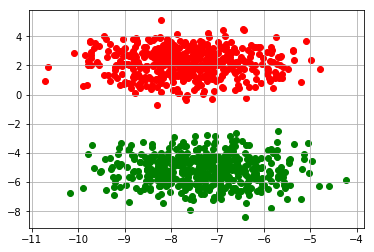

In [3]:
labels = [0, 1, 2]
colors = ['r', 'g', 'b']
fig = plt.figure()
for label, color in zip(labels, colors):
    X_ = X[y == label]
    plt.scatter(X_[:, 0], X_[:, 1], c=color)
plt.grid('on')

# Clustering

In [4]:
kmeans_model = KMeans(n_clusters=2, random_state=RANDOM_SEED)
kmeans_model.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=43, tol=0.0001, verbose=0)

In [5]:
kmeans_model.cluster_centers_

array([[-7.30776969, -5.14275779],
       [-7.66850678,  2.16632824]])

In [6]:
cluster_i = kmeans_model.predict(X)
distances = kmeans_model.transform(X)

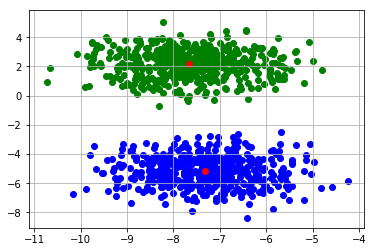

In [7]:
# Plot clustering result
labels = [0, 1]
colors = ['b', 'g']
for label, color in zip(labels, colors):
    X_ = X[cluster_i == label]
    plt.scatter(X_[:, 0], X_[:, 1], c=color)
cluster_centers = kmeans_model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='r')
plt.grid('on')

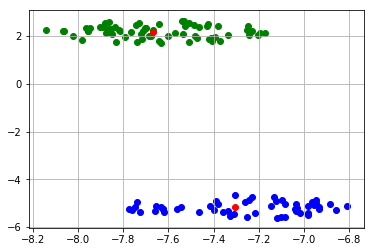

In [8]:
t_dist = 0.5
b = ((cluster_i == 1) & (distances[:, 1] < t_dist)) | ((cluster_i == 0) & (distances[:, 0] < t_dist))
X = X[b]
cluster_i = cluster_i[b]

# Plot clustering result
labels = [0, 1]
colors = ['b', 'g']
for label, color in zip(labels, colors):
    X_ = X[cluster_i == label]
    plt.scatter(X_[:, 0], X_[:, 1], c=color)
cluster_centers = kmeans_model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='r')
plt.grid('on')